In [6]:
from sklearn.cross_validation import cross_val_score

from sklearn.cross_validation import KFold

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

## Data Import and Pre-Preocessing ##

In [10]:
df = pd.read_csv('/Users/homayounsadri/Documents/Education/Stevens/Courses/CS559_Machine Learning/Project/Data/train.csv').iloc[:, 1:25]
df.shape

(665249, 24)

In [11]:
purchased_df = df[df['record_type']==1]
purchased_df.shape

(97009, 24)

In [12]:
features = [ 'shopping_pt',  'day', 'state',
 'location', 'group_size', 'homeowner', 'car_age', 'car_value', 'risk_factor',
 'age_oldest', 'age_youngest', 'married_couple', 'C_previous', 'duration_previous']

targets = ['A','B','C','D','E','F','G']

X = purchased_df[features]
y = purchased_df[targets]


In [13]:
X['state'] = pd.factorize(X['state'])[0]
X['car_value'] = pd.factorize(X['car_value'])[0]
X['location'] = pd.factorize(X['location'])[0]



/Users/homayounsadri/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [14]:
X['risk_factor'] = X['risk_factor'].fillna(5)
X['C_previous'] = X['C_previous'].fillna(0)
X['duration_previous'] = X['duration_previous'].fillna(0)


/Users/homayounsadri/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

## Train-Test Split##

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.5, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=1)

## KNN Baseline

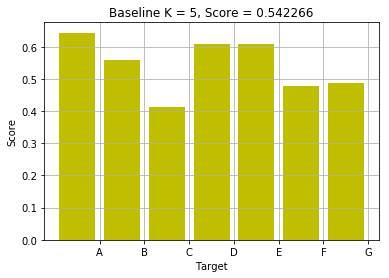

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#y_pred.shape


#for i in range(len(targets)):
#    print("\nPredictor ", targets[i])
#    print(metrics.classification_report(y_test[targets[i]], y_pred[:,i]))

score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Baseline K = 5, Score = %f'%np.mean(score))
plt.grid()
plt.show()

## KNN Feature Tuning

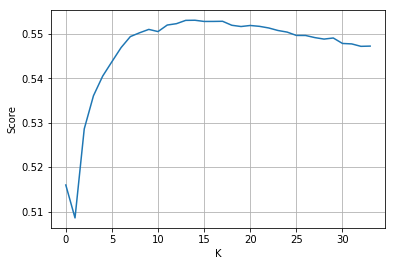

In [18]:
# try K=1 through K=35 and record testing accuracy
k_range = range(1, 35)
score_over_k =[]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_cv)
    
#    for i in range(len(targets)):
#        print("\nPredictor ", targets[i])
#        print(metrics.classification_report(y_test[targets[i]], y_pred[:,i]))
     
    score=[metrics.accuracy_score(y_cv[targets[i]], y_pred[:,i]) for i in range(len(targets))]
    
    score_over_k.append(np.mean(score))
    

plt.plot(score_over_k)

plt.xlabel('K')
plt.ylabel('Score')
plt.grid()
plt.show()

/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'i' instances.
A prox

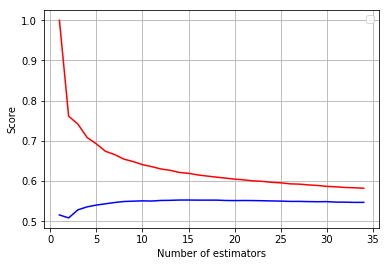

In [19]:
score_over_train =[]
score_over_cv = []

# we don't expect the score diverge, b.c. we're reducing the complexity of model, like k in knn

for i in range(1,35):
    knn = KNeighborsClassifier(n_neighbors = i)

    knn = knn.fit(X_train, y_train)

    y_pred_cv = knn.predict(X_cv)

    score_cv=[metrics.accuracy_score(y_cv[targets[i]], y_pred_cv[:,i]) for i in range(len(targets))]
    
    y_pred_train = knn.predict(X_train)
    
    score_train=[metrics.accuracy_score(y_train[targets[i]], y_pred_train[:,i]) for i in range(len(targets))]
    
    score_over_train.append(np.mean(score_train))
    score_over_cv.append(np.mean(score_cv))

plt.plot(range(1,35),score_over_train,'r',range(1,35),score_over_cv,'b')
plt.legend('train','cross validation')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.grid()
plt.show()

## KNN Optimized


Predictor  A
             precision    recall  f1-score   support

          0       0.77      0.19      0.31      5384
          1       0.64      0.98      0.78     14897
          2       0.38      0.01      0.02      3972

avg / total       0.63      0.65      0.55     24253


Predictor  B
             precision    recall  f1-score   support

          0       0.58      0.60      0.59     12684
          1       0.54      0.51      0.53     11569

avg / total       0.56      0.56      0.56     24253


Predictor  C
             precision    recall  f1-score   support

          1       0.43      0.50      0.46      7155
          2       0.30      0.12      0.17      5015
          3       0.47      0.67      0.55      9676
          4       0.26      0.01      0.03      2407

avg / total       0.40      0.44      0.39     24253


Predictor  D
             precision    recall  f1-score   support

          1       0.42      0.05      0.09      3145
          2       0.38      0.07 

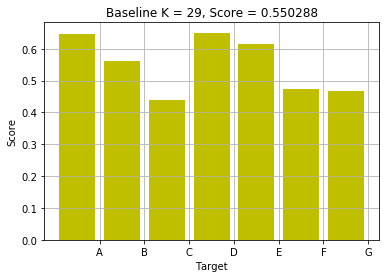

In [21]:
knn = KNeighborsClassifier(n_neighbors=29)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

#y_pred.shape


for i in range(len(targets)):
    print("\nPredictor ", targets[i])
    print(metrics.classification_report(y_test[targets[i]], y_pred[:,i]))

score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Baseline K = 29, Score = %f'%np.mean(score))
plt.grid()
plt.show()

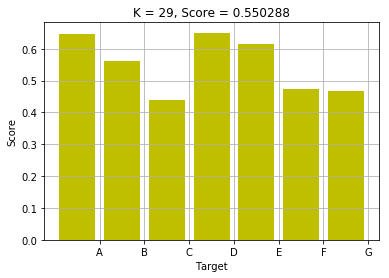

In [22]:
score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('K = 29, Score = %f'%np.mean(score))
plt.grid()
plt.show()

## Random Forest Baseline


Predictor  A
             precision    recall  f1-score   support

          0       0.71      0.60      0.65      5384
          1       0.70      0.93      0.80     14897
          2       0.00      0.00      0.00      3972

avg / total       0.59      0.70      0.63     24253


Predictor  B
             precision    recall  f1-score   support

          0       0.56      0.67      0.61     12684
          1       0.54      0.43      0.48     11569

avg / total       0.55      0.56      0.55     24253


Predictor  C
             precision    recall  f1-score   support

          1       0.68      0.72      0.70      7155
          2       0.69      0.33      0.44      5015
          3       0.63      0.91      0.75      9676
          4       0.87      0.14      0.24      2407

avg / total       0.68      0.66      0.62     24253


Predictor  D
             precision    recall  f1-score   support

          1       0.57      0.00      0.01      3145
          2       0.00      0.00 

/Users/homayounsadri/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


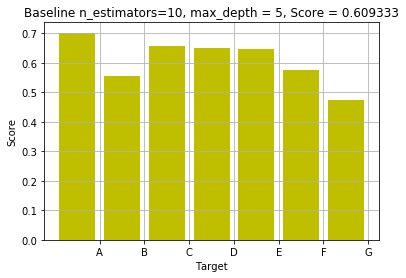

In [23]:
#Need to run the split right before

clf_rf = RandomForestClassifier(n_estimators=10, max_depth = 5)

clf_rf = clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

y_pred.shape

for i in range(len(targets)):
    print("\nPredictor ", targets[i])
    print(metrics.classification_report(y_test[targets[i]], y_pred[:,i]))

score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Baseline n_estimators=10, max_depth = 5, Score = %f'%np.mean(score))

plt.grid()
plt.show()

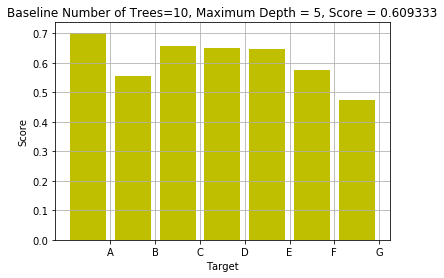

In [24]:
score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Baseline Number of Trees=10, Maximum Depth = 5, Score = %f'%np.mean(score))

plt.grid()
plt.show()

## Randon Forest - Feature Tuning 

/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'i' instances.
A prox

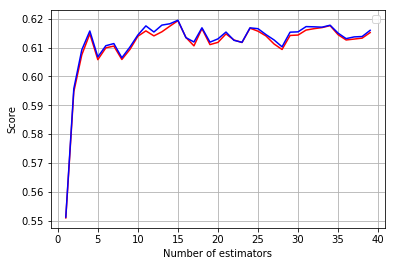

In [25]:
score_over_train =[]
score_over_cv = []

# we don't expect the score diverge, b.c. we're reducing the complexity of model, like k in knn

for i in range(1,40):
    clf_rf = RandomForestClassifier(n_estimators= i, max_depth = 5)

    clf_rf = clf_rf.fit(X_train, y_train)

    y_pred_cv = clf_rf.predict(X_cv)

    score_cv=[metrics.accuracy_score(y_cv[targets[i]], y_pred_cv[:,i]) for i in range(len(targets))]
    
    y_pred_train = clf_rf.predict(X_train)
    
    score_train=[metrics.accuracy_score(y_train[targets[i]], y_pred_train[:,i]) for i in range(len(targets))]
    
    score_over_train.append(np.mean(score_train))
    score_over_cv.append(np.mean(score_cv))

plt.plot(range(1,40),score_over_train,'r',range(1,40),score_over_cv,'b')
plt.legend('train','cross validation')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.grid()
plt.show()

/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
/Users/homayounsadri/anaconda/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'i' instances.
A prox

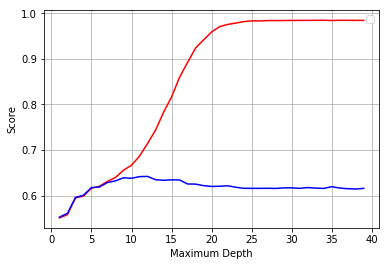

In [26]:
score_over_train =[]
score_over_cv = []

for i in range(1,40):
    clf_rf = RandomForestClassifier(n_estimators= 10, max_depth = i)

    clf_rf = clf_rf.fit(X_train, y_train)

    y_pred_cv = clf_rf.predict(X_cv)

    score_cv=[metrics.accuracy_score(y_cv[targets[i]], y_pred_cv[:,i]) for i in range(len(targets))]
    
    y_pred_train = clf_rf.predict(X_train)
    
    score_train=[metrics.accuracy_score(y_train[targets[i]], y_pred_train[:,i]) for i in range(len(targets))]
    
    score_over_train.append(np.mean(score_train))
    score_over_cv.append(np.mean(score_cv))

plt.plot(range(1,40),score_over_train,'r',range(1,40),score_over_cv,'b')
plt.legend('train','cross validation')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

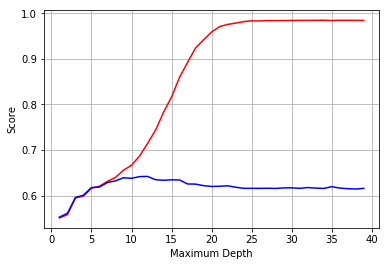

In [27]:
plt.plot(range(1,40),score_over_train,'r',range(1,40),score_over_cv,'b')
#plt.legend('train','cross validation')
plt.xlabel('Maximum Depth')
plt.ylabel('Score')
plt.grid()
plt.show()

# Random Forest Optimized


Predictor  A
             precision    recall  f1-score   support

          0       0.73      0.64      0.68      5384
          1       0.71      0.93      0.80     14897
          2       0.51      0.01      0.02      3972

avg / total       0.68      0.71      0.65     24253


Predictor  B
             precision    recall  f1-score   support

          0       0.58      0.62      0.60     12684
          1       0.55      0.50      0.52     11569

avg / total       0.56      0.56      0.56     24253


Predictor  C
             precision    recall  f1-score   support

          1       0.76      0.71      0.74      7155
          2       0.69      0.57      0.62      5015
          3       0.73      0.86      0.79      9676
          4       0.74      0.65      0.69      2407

avg / total       0.73      0.73      0.73     24253


Predictor  D
             precision    recall  f1-score   support

          1       0.46      0.34      0.39      3145
          2       0.44      0.16 

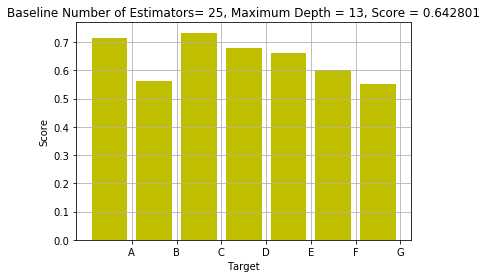

In [28]:
clf_rf = RandomForestClassifier(n_estimators= 25, max_depth = 13)

clf_rf = clf_rf.fit(X_train, y_train)

y_pred = clf_rf.predict(X_test)

#y_pred.shape


for i in range(len(targets)):
    print("\nPredictor ", targets[i])
    print(metrics.classification_report(y_test[targets[i]], y_pred[:,i]))

score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Baseline Number of Estimators= 25, Maximum Depth = 13, Score = %f'%np.mean(score))
plt.grid()
plt.show()

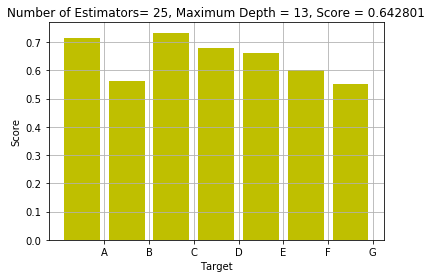

In [29]:
score=[metrics.accuracy_score(y_test[targets[i]], y_pred[:,i]) for i in range(len(targets))]
index=np.arange(len(targets))
label=list(targets)
plt.bar(index,score,color='y')
plt.xticks(index+0.5, label, rotation='horizontal')
plt.xlabel('Target')
plt.ylabel('Score')
plt.title('Number of Estimators= 25, Maximum Depth = 13, Score = %f'%np.mean(score))
plt.grid()
plt.show()

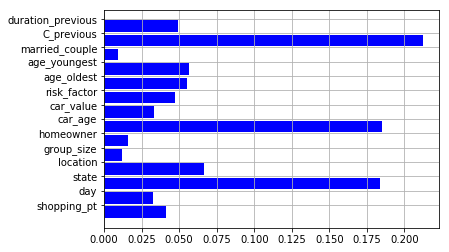

In [30]:
a = clf_rf.feature_importances_

index=np.arange(len(a))
label=list(X)
plt.barh(index,a,color='b')
plt.yticks(index+0.5, label, rotation='horizontal')
plt.grid()
plt.show()